读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [ ]:
import pandas as pd
file_path = r"D:\华师大\导论lab\repository-of-Owen\homework6_data\open_rank_20236.csv"
data = pd.read_csv(file_path)

# 获取前100名的数据（有101行）
top_100_df = data.head(101)

max_value = top_100_df['value'].max()
min_value = top_100_df['value'].min()
mean_value = top_100_df['value'].mean()
median_value = top_100_df['value'].median()

# 打印结果
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


读取data中2022文件夹下的activity_2022文件，分析美国排名前十的项目的平均增长率。

In [ ]:
import pandas as pd
file_path = r"D:\华师大\导论lab\repository-of-Owen\homework6_data\activity_2022.csv"
df = pd.read_csv(file_path)
value_columns = [f'2022{i}_value' for i in range(1, 13)]
growth_rates = [] #计算每个月的增长率
for i in range(1, len((value_columns))):
    growth_rate = (df[value_columns[i]] - df[value_columns[i-1]]) / df[value_columns[i-1]]
    growth_rates.append(growth_rate)
#transpose() 方法将行和列进行转置,每一行对应一个项目，每一列对应一个月的增长率
growth_df = pd.DataFrame(growth_rates).transpose()
df['ave_growth_rate'] = growth_df.mean(axis=1)
top_10_projects = df[['repo', 'ave_growth_rate']].head(10)
print(top_10_projects)



  repo                                     ave_growth_rate
0                MicrosoftDocs/azure-docs -0.017928       
1                           NixOS/nixpkgs  0.000295       
2                          dotnet/runtime -0.022848       
3                          elastic/kibana -0.003651       
4  firstcontributions/first-contributions  0.140824       
5                         flutter/flutter -0.012404       
6                     home-assistant/core  0.008453       
7                        microsoft/vscode  0.022905       
8                         pytorch/pytorch  0.013160       
9                          rust-lang/rust -0.003778       


data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd
china_data = pd.read_csv(r"D:\华师大\导论lab\repository-of-Owen\homework6_data\china_2022.csv")
global_data = pd.read_csv(r"D:\华师大\导论lab\repository-of-Owen\homework6_data\global_2022.csv")
columns_to_compare = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value', 'valueDelta']

china_stats = china_data[columns_to_compare].describe().T[['mean', 'min', 'max', 'std']]
global_stats = global_data[columns_to_compare].describe().T[['mean', 'min', 'max', 'std']]

print("China Statistics:")
print(china_stats)
print("\nGlobal Statistics:")
print(global_stats)

china_ranks = china_data[['name', 'rank']]
global_ranks = global_data[['name', 'rank']]

# 合并中国和全球排名数据，比较每个企业的排名差异
rank_comparison = pd.merge(china_ranks, global_ranks, on='name', suffixes=('_china', '_global'))
rank_comparison['rank_diff'] = rank_comparison['rank_china'] - rank_comparison['rank_global']

print("\nRanking Comparison (China vs Global):")
print(rank_comparison[['name', 'rank_china', 'rank_global', 'rank_diff']])


China Statistics:
                     mean       min        max           std
issue_comment   61205.500  11741.00  167814.00  49332.487917
open_issue       9169.200    752.00   22397.00   6810.653563
open_pull       16912.700   1823.00   35266.00  10068.922805
review_comment  19857.500   2113.00   60402.00  21115.073490
merged_pull     13764.100   1165.00   26732.00   7692.752064
value           40269.534  12033.71  103368.49  30905.171810
valueDelta       9265.007   2329.36   21093.11   5327.824003

Global Statistics:
                      mean       min         max            std
issue_comment   341409.400  78530.00  1437317.00  422610.256775
open_issue       43300.200  13162.00   189185.00   54001.071938
open_pull        83423.000  27414.00   309685.00   87658.295125
review_comment  120392.100  35072.00   456166.00  128239.763444
merged_pull      62472.000  15418.00   257123.00   73265.180035
value           215855.491  71636.82   824848.67  235189.889662
valueDelta       11906.921

如下为根据数据的对比分析，得出的一些结论：
在上述代码当中，对于global和china，我分别计算了其各项数据的平均值，最值以及标准差，显然，目前中国和全球开源领域的企业存在着较大的差距
全球开源企业的 issue_comment 数量远高于中国企业，这表明全球企业在开源社区的活跃度和互动量显著高于中国企业。标准差较大的数据表明，全球开源企业的 issue_comment 数量波动较大，有些企业极其活跃，而有些则较为低调；相比之下，中国企业的波动性较小，整体较为集中。
与此同时，全球的开源企业相比于中国有着更高的open issue，代表了它们更大规模的开源项目或更复杂的社区参与
并且在value值方面，全球开源企业的平均值是我国平均值的4倍左右，体现出我国想要真正成为这个开源领域的龙头军之一还有很多值得努力的地方




贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [ ]:
#贝叶斯公式比较复杂，把每个变量代表什么就列出来了
p_a = 0.25  # 非软件型项目的概率
p_not_a = 1 - p_a  # 软件型项目的概率
p_b_given_a = 0.85  # 非软件型项目中带有HTML/Markdown标签的概率
p_b_given_not_a = 0.10  # 软件型项目中带有HTML/Markdown标签的概率

p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
p_a_given_b = (p_b_given_a * p_a) / p_b

print(p_a_given_b)

0.7391304347826088


接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [ ]:
#贝叶斯公式比较复杂，把每个变量代表什么就列出来了
p_c = 0.5  # 工具组件型项目的概率
p_not_c = 1 - p_c  # 非工具组件型项目的概率
p_d_given_c = 0.35  # 工具组件型项目中由JavaScript语言编写的概率
p_d_given_not_c = 0.10  # 非工具组件型项目中由JavaScript语言编写的概率

p_d = p_d_given_c * p_c + p_d_given_not_c * p_not_c
# 根据贝叶斯定理计算P(C|D)
p_c_given_d = (p_d_given_c * p_c) / p_d
print(p_c_given_d)

In [ ]:

p_c = 0.5  # 工具组件型项目的概率
p_not_c = 1 - p_c  # 非工具组件型项目的概率
p_d_given_c = 0.35  # 工具组件型项目中由JavaScript语言编写的概率
p_d_given_not_c = 0.10  # 非工具组件型项目中由JavaScript语言编写的概率
p_d = p_d_given_c * p_c + p_d_given_not_c * p_not_c

p_c_given_d = (p_d_given_c * p_c) / p_d

print(p_c_given_d)

0.7777777777777778


根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

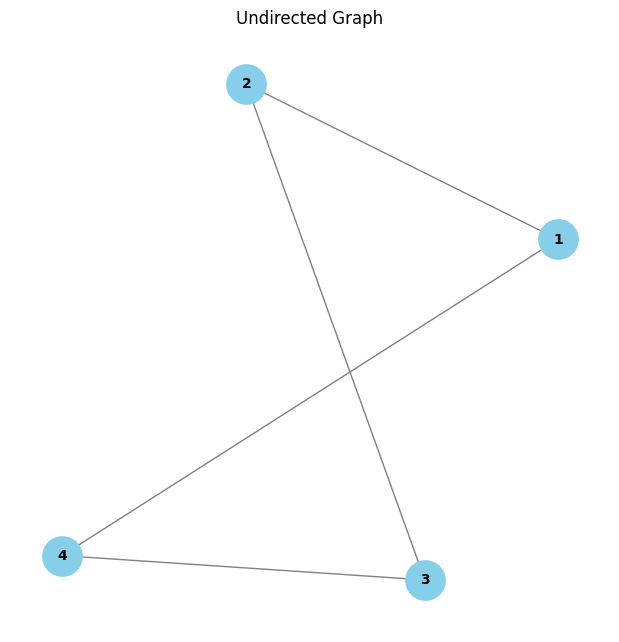

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1,2,3,4]
edge = [(1,2),(2,3),(3,4),(4,1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
plt.figure(figsize=(6,6))
nx.draw(G,with_labels=True,node_size=800,node_color='skyblue',font_size=10,font_weight='bold', edge_color='gray')
plt.title("Undirected Graph")
plt.show()

根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

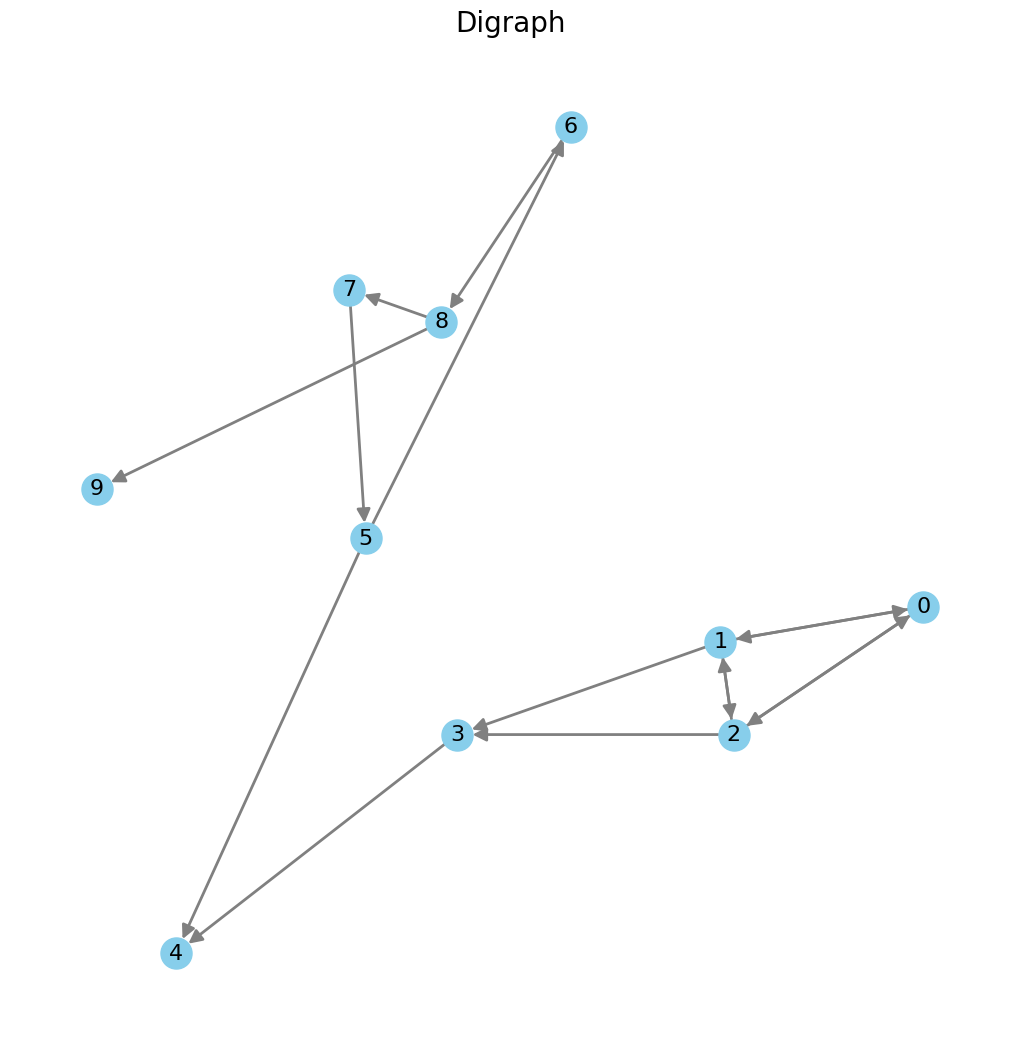

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
#定义用户
users = [0,1,2,3,4,5,6,7,8,9]
edges = [(0,1),(1,0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, font_size=16, node_color='skyblue', edge_color='gray', arrowsize=20, width=2) 
plt.title('Digraph', fontsize=20)
plt.show()

针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank Values:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


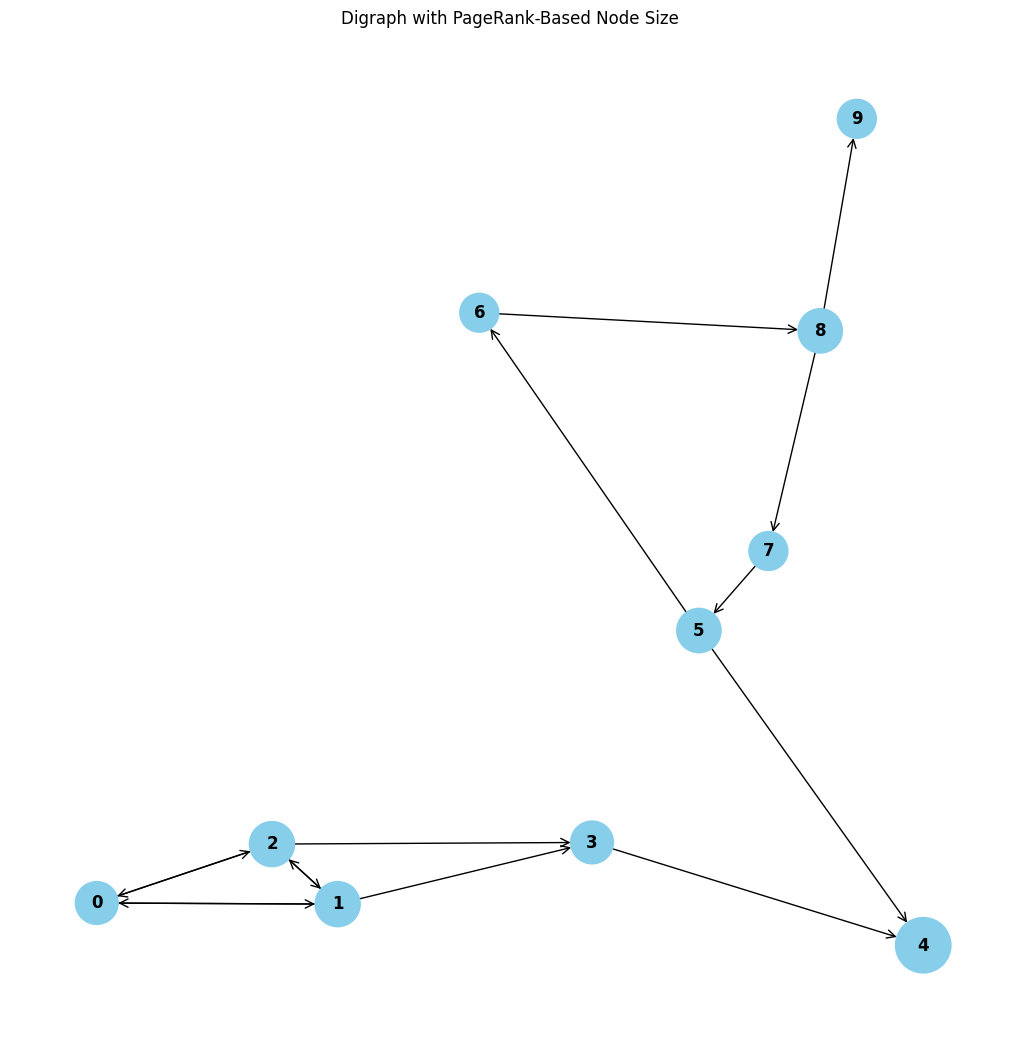

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

# 装一个scipy的库，能够利用Python里面的pagerank算法计算节点的PageRank值
pagerank_values = nx.pagerank(G)

print("PageRank Values:")
for node, rank in pagerank_values.items():
    print(f"Node {node}: {rank:.4f}")

# 根据 PageRank 值调整节点大小
node_sizes = [pagerank_values[node] * 10000 for node in G.nodes]

plt.figure(figsize=(10, 10))
nx.draw(
    G, with_labels=True, node_size=node_sizes, 
    node_color='skyblue', font_size=12, font_weight='bold', 
    arrowstyle='->', arrowsize=15
)

# 展示图形
plt.title("Digraph with PageRank-Based Node Size")
plt.show()
